<a href="https://colab.research.google.com/github/yhy0519/Machine_learning_of_Python/blob/main/python_m03_02_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**■ 머신러닝 데이터 분석 5가지 단계 ( 빅 피쳐 )**

     1. 데이터 수집과 설명 : pandas 를 사용 
     2. 데이터 탐색 및 시각화 : pandas, matplotlib, seaborn 사용
     3. 머신러닝 모델 훈련 : sklearn 사용
     4. 머신러닝 모델 평가 : pandas 사용
     5. 머신러닝 모델 성능 개선 : pandas 를 사용 ( 파생변수 생성 )


성능 개선 방법 : 단순 회귀 ---> 다항회귀로 변경해서 성능을 올린다. 

     1. 단순회귀 : 독립변수 한개에 종속변수 한 개 ( 선형 회귀선 ) 
     2. 다항회귀 : 독립변수 한개에 종속변수 한 개 ( 비선형 회귀선 )
     3. 다중회귀 : 종속변수에 영향을 주는 독립변수가 여러개인 경우.


#**■ 다항 회귀 분석(Polynomial Regression)**



문제. 무게와 연비간의 예측값과 실제값의 비교 단순회귀분석의 결과 그래프를 보면 실제값은 왼쪽으로 편향되어있고  
예측값을 반대로 오른쪽으로 편중되는 경향을 보인

```
# 코드로 형식

```
# 코드로 형식 지정됨
```

지정됨
```

다.  

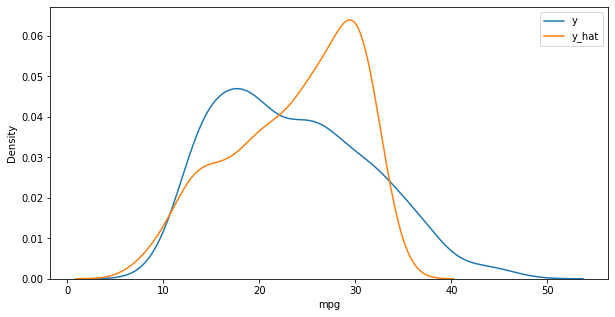

따라서 독립변수(weight) 과 종속변수(mpg) 사이의 선형관계가 있지만, 모형의 오차를 더 줄일 필요가 있어 보인다.  
앞에서 본 산포도를 보면 직선보다는 곡선이 더 적합해 보인다.  비선형 회귀분석을 통해 모형의 정확도를 더 높이시오.


In [40]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
'''
[Step 1 ~ 4] 데이터 준비
'''

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('/content/drive/MyDrive/data/auto-mpg.csv', header=None)
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [64]:
# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight', 'acceleration','model year','origin','name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [65]:
# pd.set_option('display.max_row', 500)  # 데이터 더 많이 보고 싶을때 사용
(df['horsepower']=='?').sum()

6

In [66]:
# horsepower 열의 자료형 변경 (문자열 -> 숫자)
df['horsepower'].replace('?', np.nan, inplace=True)     # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)  # 누락데이터 행을 삭제(axis = 0 : 행, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')     # 문자열을 실수형으로 변환
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [67]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0
...,...,...,...,...
393,27.0,4,86.0,2790.0
394,44.0,4,52.0,2130.0
395,32.0,4,84.0,2295.0
396,28.0,4,79.0,2625.0


In [68]:
# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['weight']] # 독립 변수 X
y=ndf['mpg']      # 종속 변수 y
 
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)
print('\n')

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)




In [78]:
'''
Step 5: 비선형회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 필요한 모듈 가져오기
from sklearn.linear_model import LinearRegression     # 선형회귀분석
from sklearn.preprocessing import PolynomialFeatures  # 다항식 변환

# 다항식 변환
poly = PolynomialFeatures(degree=2, include_bias=False)       # 2차항 적용, include_bias=False 옵션 : 상수항 제외하고 출력
X_train_poly = poly.fit_transform(X_train)  # X_train 데이터를 2차항으로 변형
print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)   # 1, x, x^2 으로 생성
print('\n')

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 2)




In [70]:
X_train_poly

array([[1.00000000e+00, 4.20900000e+03, 1.77156810e+07, 7.45653013e+10],
       [1.00000000e+00, 2.22300000e+03, 4.94172900e+06, 1.09854636e+10],
       [1.00000000e+00, 3.41000000e+03, 1.16281000e+07, 3.96518210e+10],
       ...,
       [1.00000000e+00, 2.83300000e+03, 8.02588900e+06, 2.27373435e+10],
       [1.00000000e+00, 2.90100000e+03, 8.41580100e+06, 2.44142387e+10],
       [1.00000000e+00, 2.56000000e+03, 6.55360000e+06, 1.67772160e+10]])

In [79]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test) # X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)
print(r_square)
print('\n')

0.7087009262975499




In [80]:
a = pr.fit(X_train_poly, y_train)
a.coef_

array([-1.85768289e-02,  1.70491223e-06])

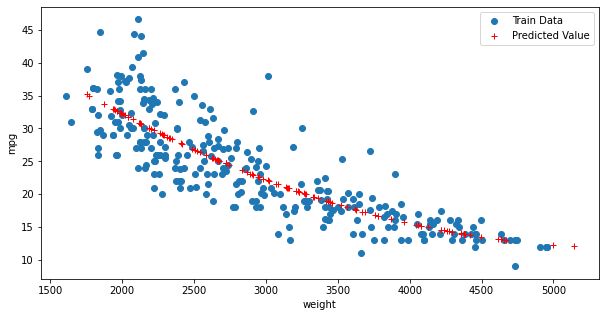

In [53]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')             # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value')     # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


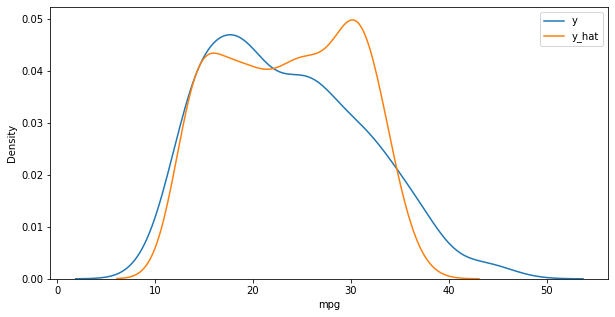

In [54]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.legend()
plt.show()
plt.close()

문제19. 어제 마지막 문제로 풀었던 체중과 키와의 단순 선형 회귀 분석 결과의 테스트 데이터에 대한 결정계수는 0.86 이었습니다.  
그렇다면 이번에는 다항 회귀로 비선형 회귀선을 만들어 결정계수를 더 올리시오.

In [86]:
# 필요한 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# step1. 데이터 프레임으로 변환시키기

weight=[ 72, 72, 70, 43, 48, 54, 51, 52, 73, 45, 60, 62, 64, 47, 51, 74, 88,64, 56, 56  ]
tall = [ 176, 172, 182, 160, 163, 165, 168, 163, 182, 148, 170, 166, 172, 169, 163, 170, 182, 174, 164, 160 ]

dict_data = { 'weight' : [ 72, 72, 70, 43, 48, 54, 51, 52, 73, 45, 60, 62, 64, 47, 51, 74, 88, 64, 56, 56  ],
                  'tall' : [ 176, 172, 182, 160, 163, 165, 168, 163, 182, 148, 170, 166, 172, 169, 163, 170, 182, 174, 164, 160 ]   }

df = pd.DataFrame(dict_data)
df

,weight,tall
0,72,176
1,72,172
2,70,182
3,43,160
4,48,163
5,54,165
6,51,168
7,52,163
8,73,182
9,45,148


In [88]:
#Step 2: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

# 속성(변수) 선택

X=df[['weight']] # 독립 변수 X
y=df['tall']     # 종속 변수 Y

# train data 와 test data로 구분(9:1 비율)
# 데이터 양이 적기 때문에 9대 1로 나눠줌
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, # 독립 변수
                                                    y, # 종속 변수
                                                    test_size=0.1,   # 검증 10%
                                                    random_state=10) # 랜덤 추출 값

print('train data 개수: ', len(X_train))   # 18개
print('test data 개수: ', len(X_test))     # 2개

train data 개수:  18
test data 개수:  2


In [89]:
# Step 3: 다중회귀분석 모형 - sklearn 사용
# sklearn 라이브러리에서 필요한 모듈 가져오기
from sklearn.linear_model import LinearRegression #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures #다항식 변환

# 다항식 변환
poly = PolynomialFeatures(degree=2) # 2차항 적용
X_train_poly=poly.fit_transform(X_train)  # X_train 데이터를 2차항으로 변형
print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)
print('\n')

원 데이터:  (18, 1)
2차항 변환 데이터:  (18, 3)




In [90]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)


# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test) #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)
print(r_square)

0.926396504610928


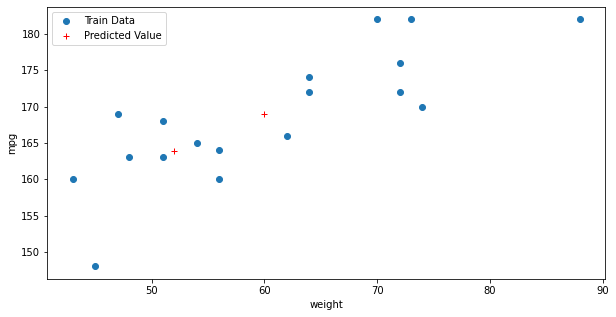

In [91]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


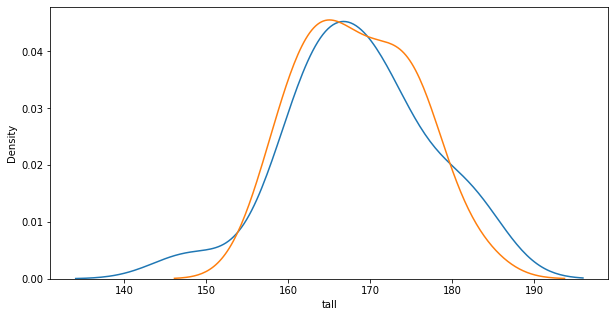

In [61]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

#**■ 다중 회귀 분석(Multi Regression)**

종속변수에 영향을 주는 독립변수가 여러개인 경우

예제1. 미국 우주 왕복선 폭파 원인  
예제2. 미국 대학교 입학점수에 영향을 미치는 과목 분석  
예제3. 미국 국민 의료비에 영향을 주는 요소 분석  

**▩ 예제1. 미국 우주 왕복선 폭파 원인**


In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/data/challenger.csv", engine='python', encoding='CP949')
df

,distress_ct,temperature,field_check_pressure,flight_num
0,0,66,50,1
1,1,70,50,2
2,0,69,50,3
3,0,68,50,4
4,0,67,50,5
5,0,72,50,6
6,0,73,100,7
7,0,70,100,8
8,1,57,200,9
9,1,63,200,10


In [ ]:
# 다중 회귀 분석 코드

model = smf.ols( formula='distress_ct ~ temperature + field_check_pressure + flight_num',
                data = df)

result = model.fit()
print( result.summary() )

                            OLS Regression Results                            
Dep. Variable:            distress_ct   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     3.563
Date:                Wed, 24 Feb 2021   Prob (F-statistic):             0.0337
Time:                        02:05:05   Log-Likelihood:                -17.308
No. Observations:                  23   AIC:                             42.62
Df Residuals:                      19   BIC:                             47.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.5271 

분석결과 설명: o 형링 파손에 영향을 주는 가장 큰 독립변수는 온도 입니다. 그 다음이 비행기 노후화를 나타내는 비행기 번호 입니다.

    회귀식 : y(distress_ct) = 3.5271 - 0.0514 * x1(temperature) + 0.0018 * x2(field_check_pressure) + 0.0143 * x3(flight_num)

문제20. statsmodels 패키지를 이용해서 방금 다중 회귀 분석을 해보았는데 이번에는 중요한
   독립변수인 temperature 만 이용해서 단순회귀 분석을 진행하고 분석된 결과를 출력하세요

종속변수 : distress_ct (o 형링 파손수)
독립변수 : temperature(온도)

In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/data/challenger.csv", engine='python', encoding='CP949')
print(df)

# 단순 회귀 분석 코드

model = smf.ols( formula='distress_ct ~ temperature',
                data = df)

result = model.fit()
print( result.summary() )

    distress_ct  temperature  field_check_pressure  flight_num
0             0           66                    50           1
1             1           70                    50           2
2             0           69                    50           3
3             0           68                    50           4
4             0           67                    50           5
5             0           72                    50           6
6             0           73                   100           7
7             0           70                   100           8
8             1           57                   200           9
9             1           63                   200          10
10            1           70                   200          11
11            0           78                   200          12
12            0           67                   200          13
13            2           53                   200          14
14            0           67                   200     

회귀식 : 

    y(distress_ct) = 3.6984 - 0.0475 * x1 (temperature)
    ↑                                 ↑
    파손수                            온도

	2.21 개                        31도 F(화씨)
	0.82 개                        60도 F(화씨)
	0.34 개                        70도 F(화씨)

분석결과: 화씨 30도에서 발사하는게 화씨 60도에서 발사하는 것 보다 약 3배 더 위험하고 화씨 70도에서 발사하는 것 보다 약 7~8배 더 위험합니다.


**▩ 예제2. 미국 대학교 입학점수에 영향을 미치는 과목 분석**

데이터 : sports.csv

종속변수 : acceptance

독립변수 : academic, sports, music

설명: 
분석요청 : 학과점수, 체육점수, 음악점수 중에 어떤 것이 더 입학 여부에 큰 영향을 주는지 ?  
		3과목의 점수 단위가 과목마다 다릅니다. (예: 체중과 키 처럼)  
		그래서 이런 경우에는 표준화를 하고 회귀분석을 해야합니다.

①. 표준화를 안했을때 ? 

In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from  sklearn.preprocessing import StandardScaler   # 표준화를 위해 필요

# 1. 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/data/sports.csv", engine='python', encoding='CP949') 
df.columns = ['stud_id', 'academic', 'sports', 'music', 'acceptance']   # 컬럼명을 지정합니다.
print(df)


# 2. 모델 생성하기
model = smf.ols(formula = 'acceptance ~ academic + sports + music', data = df)

result = model.fit()  # 모델 훈련
print( result.summary() )

     stud_id  academic  sports      music  acceptance
0          1     230.1    37.8  62.909091   81.851852
1          2      44.5    39.3  41.000000   38.518519
2          3      17.2    45.9  63.000000   34.444444
3          4     151.5    41.3  68.518519   68.518519
4          5     180.8    10.8  53.090909   47.777778
..       ...       ...     ...        ...         ...
195      196      38.2     3.7  12.545455   28.148148
196      197      94.2     4.9   7.363636   35.925926
197      198     177.0     9.3   5.818182   47.407407
198      199     283.6    42.0  60.181818   94.444444
199      200     232.1     8.6   7.909091   49.629630

[200 rows x 5 columns]
                            OLS Regression Results                            
Dep. Variable:             acceptance   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     634.8
Date:       

분석결과 : 표준화를 안했을때는 체육점수가 학과점수보다 더 영향력이 컸습니다.

②. 표준화를 했을때 ?

In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from  sklearn.preprocessing import StandardScaler   # 표준화를 위해 필요

# 1. 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/data/sports.csv", engine='python', encoding='CP949') 
df

,Unnamed: 0,academic,sports,music,acceptance
0,1,230.1,37.8,62.909091,81.851852
1,2,44.5,39.3,41.000000,38.518519
2,3,17.2,45.9,63.000000,34.444444
3,4,151.5,41.3,68.518519,68.518519
4,5,180.8,10.8,53.090909,47.777778
...,...,...,...,...,...
195,196,38.2,3.7,12.545455,28.148148
196,197,94.2,4.9,7.363636,35.925926
197,198,177.0,9.3,5.818182,47.407407
198,199,283.6,42.0,60.181818,94.444444


In [ ]:
# 2. 표준화
scaler = StandardScaler()
scaler.fit(df)   # 표준화를 위해 df 데이터를 살펴본다.
df_scale = scaler.transform(df)  # 표준화 작업 수행한 결과를 df 에 할당
print(df_scale)   # np.array 로 구성

[[-1.72341210e+00  9.69852266e-01  9.81522472e-01  8.11433037e-01
   1.55205313e+00]
 [-1.70609137e+00 -1.19737623e+00  1.08280781e+00  2.47344000e-02
  -6.96046111e-01]
 [-1.68877065e+00 -1.51615499e+00  1.52846331e+00  8.14697347e-01
  -9.07405869e-01]
 [-1.67144992e+00  5.20496822e-02  1.21785493e+00  1.01285304e+00
   8.60330287e-01]
 [-1.65412920e+00  3.94182198e-01 -8.41613655e-01  4.58887590e-01
  -2.15683025e-01]
 [-1.63680847e+00 -1.61540845e+00  1.73103399e+00  1.00076300e+00
  -1.31091086e+00]
 [-1.61948775e+00 -1.04557682e+00  6.43904671e-01 -6.80356495e-01
  -4.27042783e-01]
 [-1.60216702e+00 -3.13436589e-01 -2.47406325e-01 -1.06880935e+00
  -1.58039455e-01]
 [-1.58484630e+00 -1.61657614e+00 -1.42906863e+00 -1.41482618e+00
  -1.77205942e+00]
 [-1.56752558e+00  6.16042873e-01 -1.39530685e+00 -7.55435618e-01
  -6.57617064e-01]
 [-1.55020485e+00 -9.45155670e-01 -1.17923146e+00 -6.57506327e-01
  -1.04190753e+00]
 [-1.53288413e+00  7.90028350e-01  4.96973404e-02  8.66563601e-01

In [ ]:
# 3. 판다스 데이터 프레임으로 구성합니다.
df_scale2 = pd.DataFrame(df_scale)
df_scale2.head()

,0,1,2,3,4
0,-1.723412,0.969852,0.981522,0.811433,1.552053
1,-1.706091,-1.197376,1.082808,0.024734,-0.696046
2,-1.688771,-1.516155,1.528463,0.814697,-0.907406
3,-1.671450,0.052050,1.217855,1.012853,0.860330
4,-1.654129,0.394182,-0.841614,0.458888,-0.215683


In [ ]:
# 4. 컬럼을 구성합니다.
df_scale2.columns = ['stud_id', 'academic', 'sports', 'music', 'acceptance']   # 컬럼명을 지정합니다.
df_scale2.head()

,stud_id,academic,sports,music,acceptance
0,-1.723412,0.969852,0.981522,0.811433,1.552053
1,-1.706091,-1.197376,1.082808,0.024734,-0.696046
2,-1.688771,-1.516155,1.528463,0.814697,-0.907406
3,-1.671450,0.052050,1.217855,1.012853,0.860330
4,-1.654129,0.394182,-0.841614,0.458888,-0.215683


In [ ]:
# 5. 회귀모델을 생성하고 summary 결과를 봅니다.
model = smf.ols(formula = 'acceptance ~ academic + sports + music', data = df_scale2)
result = model.fit()  # 모델 훈련
print( result.summary() )

                            OLS Regression Results                            
Dep. Variable:             acceptance   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     634.8
Date:                Wed, 24 Feb 2021   Prob (F-statistic):          1.21e-100
Time:                        03:05:00   Log-Likelihood:                -46.609
No. Observations:                 200   AIC:                             101.2
Df Residuals:                     196   BIC:                             114.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.388e-17      0.022  -6.36e-16      1.0

분석결과 : 학과점수가 체육점수보다 더 영향력이 큰 독립변수로 나타나고 있습니다.

**▩ 예제3. 미국 국민 의료비에 영향을 주는 요소 분석**

문제21. 미국 의료비 데이터(insurance.csv)를 가지고 다중회귀분석을 하시오 !
	   회귀분석한 결과를 출력하세요 ~

    종속변수 : expenses
    독립변수 : age, sex, bmi, children, smoker, region

표준화하지 말고 진행.  
가족이 한명 늘어날수록 연간 의료비가 얼마나 늘어나는지 보려면 표준화하면 안됩니다.

In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from  sklearn.preprocessing import StandardScaler   # 표준화를 위해 필요

# 1. 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/data/insurance.csv", engine='python', encoding='CP949') 
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
# 2. 모델 생성하기
model = smf.ols(formula = 'expenses ~ age + sex + bmi + children + smoker + region', data = df)

result = model.fit()  # 모델 훈련
print( result.summary() )

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.9
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        05:50:43   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.194e+04    

분석결과:

    sex[T.male] : -131.3520 --> 남성은 여성에 비해 매년 의료비가 131달러 적게 들거라 예상
    smoker[T.yes] : 2.385e+04 --> 흡연자는 비흡연자보다 매년 의료비가 2.368x10^4=23,680 달러 비용이 더 든다
    age : 256.8392  --> 나이가 일년씩 더해질 때 마다 평균적으로 의료비가 256달러 더 든다.
    bmi : 339.2899  --> 비만지수가 증가할 때 마다 339달러 더 들거라 예상
    children : 475.6889 --> 부양가족이 한명 더 늘어날 때 마다 연간 의료비가 475달러 더 든다.
    지역별로는 북동지역이 북서, 남동, 남서에 비해 의료비가 더 든다.
    결정계수(R-squared) : 0.751

문제22. 비만인 사람은 의료비가 더 지출이 되는지 파생변수를 추가해서 확인하시오 !  
	   bmi30 이라는 파생변수를 추가하는데 bmi 가 30 이상이면 1, 아니면 0 이라고 해서
	   컬럼을 하나 만드세요 ~
	
** 파생변수 추가 방법
 1. R 에서 df$bmi <- ifelse( bmi >= 30, 1, 0)
 2. 파이썬에서 df['bmi30'] = df['bmi'].apply(함수)

** 파이썬 함수를 생성하는데 입력값이 30 이상이면 1이고 아니면 0을 출력하는 함수를
   func_1 이라는 이름으로 생성하시오 !

In [ ]:
def func_1(x):
    if x >= 30:
        return 1
    else:
        return 0

print(func_1(5))
print(func_1(35))

0
1


In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from  sklearn.preprocessing import StandardScaler   # 표준화를 위해 필요

# 1. 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/data/insurance.csv", engine='python', encoding='CP949') 
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
# 2. 파생변수 추가
def func_1(x):
    if x >= 30:
        return 1
    else:
        return 0

df['bmi30'] = df['bmi'].apply(func_1)
df

,age,sex,bmi,children,smoker,region,expenses,bmi30
0,19,female,27.9,0,yes,southwest,16884.92,0
1,18,male,33.8,1,no,southeast,1725.55,1
2,28,male,33.0,3,no,southeast,4449.46,1
3,33,male,22.7,0,no,northwest,21984.47,0
4,32,male,28.9,0,no,northwest,3866.86,0
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,1
1334,18,female,31.9,0,no,northeast,2205.98,1
1335,18,female,36.9,0,no,southeast,1629.83,1
1336,21,female,25.8,0,no,southwest,2007.95,0


문제23. 비만인 사람(bmi30) 을 분류하는 파생변수를 추가했으면 결정계수가 더 올라가는지 확인하시오 !

In [ ]:
# 3. 모델 생성하기
model = smf.ols(formula = 'expenses ~ age + sex + bmi + children + smoker + region + bmi30', data = df)

result = model.fit()  # 모델 훈련
print( result.summary() )

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     456.9
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        05:54:23   Log-Likelihood:                -13534.
No. Observations:                1338   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -7657.5942   1

분석결과: R-squared 기존 0.751에서 0.756 으로 올라갔습니다.

문제24. 비만이면서 흡연까지 하면 의료비가 더 드는지 확인하시오 !

In [ ]:
# 3. 모델 생성하기
model = smf.ols(formula = 'expenses ~ age + sex + bmi + children + smoker + region \
                + bmi30 + bmi30 * smoker', data = df)
result = model.fit()  # 모델 훈련
print( result.summary() )

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     842.1
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        05:54:45   Log-Likelihood:                -13144.
No. Observations:                1338   AIC:                         2.631e+04
Df Residuals:                    1327   BIC:                         2.637e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4740.6822    

R-squared : 0.864  
bmi30 * smoker 의 회귀계수 : 1.979e+04   
설명 : 비만이면서 흡연까지 하게되면 연간 의료비가 19,790 달러 더 들거라 예상이 됩니다.


**■ 다중공선성 확인을 파이썬으로 구현하기**

  다중공선성  

    회귀분석에서 사용된 모형의 일부 독립변수가 다른 독립변수와의 상관정도가 아주 높아서 회귀분석 결과에 부정적 영향을 미치는 현상을 말합니다.

두 독립변수들끼리 서로에게 영향을 주고 있다면 둘 중 하나의 영향력을 검증할 때 다른 하나의 영향력이 약해집니다.

    예: 학업 성취도, 일 평균 음주량, 혈중 알코올 농도
            ↑
        종속변수

팽창계수가 보통은 10보다 큰 것을 골라내고 까다롭게 하려면 5보다 큰 것을 골라냅니다.

일 평균 음주량, 혈중 알코올 농도 둘 다 팽창계수가 높게 나온다면 둘중에 하나를 빼고 아래와 같이 실시한다.

    학업 성취도, 일 평균 음주량 ---> 회귀분석
    학업 성취도, 혈중 알코올 농도 ---> 회귀분석


예제: crab.csv : 게의 크기, 무게 등에 대한 데이터로 종속변수가 y 컬럼인데 0과 1로 분류하는 데이터 입니다.

In [ ]:
# 1. 데이터 불러오기
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/data/crab.csv")
df.head()

,crab,sat,y,weight,width,color,spine
0,1,8,1,3.05,28.3,2,3
1,2,0,0,1.55,22.5,3,3
2,3,9,1,2.30,26.0,1,1
3,4,0,0,2.10,24.8,3,3
4,5,4,1,2.60,26.0,3,3


In [ ]:
df.y.unique()

array([1, 0])

In [ ]:
# 2. 다중회귀분석을 하고 종속변수에 영향을 주는 독립변수들이 무엇인지 확인하기
import statsmodels.formula.api as smf

model = smf.ols('y ~ sat + weight + width', data=df)
result = model.fit()
print( result.summary() )

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     59.69
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           2.30e-26
Time:                        05:59:39   Log-Likelihood:                -55.831
No. Observations:                 173   AIC:                             119.7
Df Residuals:                     169   BIC:                             132.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9366      0.500     -1.872      0.0

분석결과: width는 종속변수에 영향을 주는 유의미한 독립변수로 나타나지만 weight는 그렇지 않게 보입니다.  
(weight 의 회귀계수 P>|t| = 0.635)  
별로 중요한 독립변수로 보고 있지 않습니다. 
             분석을 잘못할 수 있게 됩니다.

In [ ]:
# 3. 팽창계수를 확인합니다.

from statsmodels.stats.outliers_influence import variance_inflation_factor

print( model.exog_names )   # 모델에서 분석한 독립변수들이 출력

print(variance_inflation_factor(model.exog, 1))  # 위의 출력된 독립변수중에 첫번째 컬럼의 팽창계수 확인
print(variance_inflation_factor(model.exog, 2))
print(variance_inflation_factor(model.exog, 3))

['Intercept', 'sat', 'weight', 'width']
1.15883687808578
4.80167942403924
4.688660343641888


    1.15883687808578  : sat ~ weight + width 모델의 분산팽창계수
    4.8016794240392375 : weight ~ sat + width 모델의 분산팽창계수
    4.688660343641888 : width ~ sat + weight 모델의 분산팽창계수

weight 과 width 가 높은 팽창계수를 보이고 있습니다.


In [ ]:
# 4. 위의 팽창계수가 높은 두개의 독립변수를 각각 따로따로 이용해서 모델을 생성합니다.

model1 = smf.ols( 'y ~ sat + width', data=df )
print(model1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     89.83
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           2.39e-27
Time:                        06:57:02   Log-Likelihood:                -55.947
No. Observations:                 173   AIC:                             117.9
Df Residuals:                     170   BIC:                             127.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7600      0.334     -2.274      0.0

In [ ]:
model2 = smf.ols( 'y ~ sat + weight', data=df )
print(model2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     85.93
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           1.63e-26
Time:                        06:57:13   Log-Likelihood:                -57.901
No. Observations:                 173   AIC:                             121.8
Df Residuals:                     170   BIC:                             131.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0495      0.114      0.433      0.6

설명: 아까는 weight 가 중요하지 않은 독립변수였는데 width 를 빼고 분석해보니 중요한 독립변수임이 확인이 되고 있습니다.

문제25. test_vif1.csv 를 내려받고 팽창계수를 확인하여 vif 지수가 높은 독립변수들이 무엇이 있는지 확인하시오 !

데이터 설명 : 아이큐, 공부시간, 시험점수로 되어있는 데이터입니다.


In [ ]:
# 1. 데이터 불러오기
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/data/test_vif1.csv", encoding = 'CP949')
df

,학생번호,시험점수,아이큐,공부시간
0,1,100,125,30
1,2,95,104,40
2,3,92,110,25
3,4,90,105,20
4,5,85,100,20
5,6,80,100,20
6,7,78,95,15
7,8,75,95,10
8,9,72,85,0
9,10,65,90,5


In [ ]:
# 2. 다중회귀분석을 하고 종속변수에 영향을 주는 독립변수들이 무엇인지 확인하기
import statsmodels.formula.api as smf

model = smf.ols('시험점수 ~ 아이큐 + 공부시간', data=df)
result = model.fit()
print( result.summary() )

                            OLS Regression Results                            
Dep. Variable:                   시험점수   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     33.45
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           0.000262
Time:                        07:02:22   Log-Likelihood:                -25.952
No. Observations:                  10   AIC:                             57.90
Df Residuals:                       7   BIC:                             58.81
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.1561     15.967      1.450      0.1

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [ ]:
# 3. 팽창계수를 확인합니다.

from statsmodels.stats.outliers_influence import variance_inflation_factor

print( model.exog_names )   # 모델에서 분석한 독립변수들이 출력

print(variance_inflation_factor(model.exog, 1))
print(variance_inflation_factor(model.exog, 2))

['Intercept', '아이큐', '공부시간']
2.466400580551524
2.466400580551525


VIF 지수가 높은 변수는 없습니다.

**■ 내가 추가한 파생변수가 유의미한 파생변수인지 확인을 하고 여러 독립변수들 중에 불필요한 독립변수를 제거하고 필요한 독립변수들만 골라내서 회귀분석 할 때 사용하는 step 함수를 파이썬으로 구현하기**

In [ ]:
# 1. R 의 step 함수의 기능을 가지고 있는 패키지 등 import 합니다.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

In [ ]:
# 2. 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/data/insurance.csv", engine='python', encoding='CP949') 
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
# 3. 컬럼을 인코딩합니다.(명목형 변수 더미변수로 변환)
df = pd.get_dummies(df, drop_first=True)
print(df.head())   # 총 9개의 컬럼이 만들어졌음
print('\n')
print(df.columns.values)  # 컬럼명을 numpy array 형태로 출력

   age   bmi  children  ...  region_northwest  region_southeast  region_southwest
0   19  27.9         0  ...                 0                 0                 1
1   18  33.8         1  ...                 0                 1                 0
2   28  33.0         3  ...                 0                 1                 0
3   33  22.7         0  ...                 1                 0                 0
4   32  28.9         0  ...                 1                 0                 0

[5 rows x 9 columns]


['age' 'bmi' 'children' 'expenses' 'sex_male' 'smoker_yes'
 'region_northwest' 'region_southeast' 'region_southwest']


In [ ]:
# 4. 독립변수와 종속변수를 numpy array 로 변환합니다.
#X = # 독립변수들 (numpy array 형태) --> age+sex+bim+children+smoker+region
X = df.iloc[ : ,[0,1,2,4,5,6,7,8]].to_numpy()
#y = # 종속변수 --> expenses
y = df.iloc[ : ,3].to_numpy()

In [ ]:
# 5. 회귀 모델을 생성합니다.
model = LinearRegression()

In [ ]:
# 6.  step 함수를 이용해서 필요한 독립변수들을 선별합니다.
#selector = RFE(회귀모델명, n_features_to_select=선별할 독립변수의 개수, step=스텝회수)
selector = RFE(model, n_features_to_select=6, step=1)

selector = selector.fit(X, y)

print(selector.support_)  # 8개의 독립변수들 중에 선택된 6개가 True 로 출력이 됨

print(selector.ranking_)  # 8개의 독립변수들의 중요도 순위가 출력이 됨

[False  True  True False  True  True  True  True]
[2 1 1 3 1 1 1 1]


['age' 'bmi' 'children' 'sex_male' 'smoker_yes'
 'region_northwest' 'region_southeast' 'region_southwest'] 의 8개의 독립변수들 중  
 bmi, children, smoker_yes, region_northwest, region_southeast, region_southwest 6개 변수 선택